In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import category_encoders as ce
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [32]:
#data is age	workclass	education	education.num	marital.status	occupation	relationship	race	Gender	capital.gain	capital.loss	hours.per.week	native.country	income	income_value

df = pd.read_csv(r"census_income_original_2.csv")
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df.drop(columns=['income'], inplace=True)
df_cleaned = df

df_cleaned['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df_cleaned = df[~((df['income_value'] < 50000) & (df['income>50k'] == 1))]
df_cleaned = df[~((df['income_value'] >= 50000) & (df['income>50k'] == 0))]

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_1860\911199155.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"census_income_original_2.csv")


In [33]:

# Load the dataset
df = pd.read_csv(r"census_income_original_2.csv")
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df.drop(columns=['income'], inplace=True)

# Clean the data based on income_value and income>50k
df['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df_cleaned = df[~((df['income_value'] < 50000) & (df['income>50k'] == 1))]
df_cleaned = df[~((df['income_value'] >= 50000) & (df['income>50k'] == 0))]

cont_cols = ['income_value', 'education.num', 'capital.gain', 'capital.loss', 
            'age', 'hours.per.week']
df2 = df_cleaned[cont_cols].copy()
df2['capital.loss'] = df2['capital.loss'] * -1
df2['net_capital'] = df2['capital.gain'] + df2['capital.loss']
df2.drop(columns=['capital.gain', 'capital.loss'], inplace=True)



C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_1860\2410544882.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"census_income_original_2.csv")


In [36]:
df2.describe()

,income_value,education.num,age,hours.per.week,net_capital
count,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000
mean,10157.251761,9.634481,37.131739,39.031450,273.979363
std,8847.092120,2.427339,14.177165,12.263139,3864.808842
min,0.050000,1.000000,17.000000,1.000000,-4356.000000
25%,4233.500000,9.000000,26.000000,36.000000,0.000000
50%,7644.000000,9.000000,34.000000,40.000000,0.000000
75%,14446.750000,10.000000,46.000000,40.000000,0.000000
max,100145.000000,16.000000,90.000000,99.000000,99999.000000


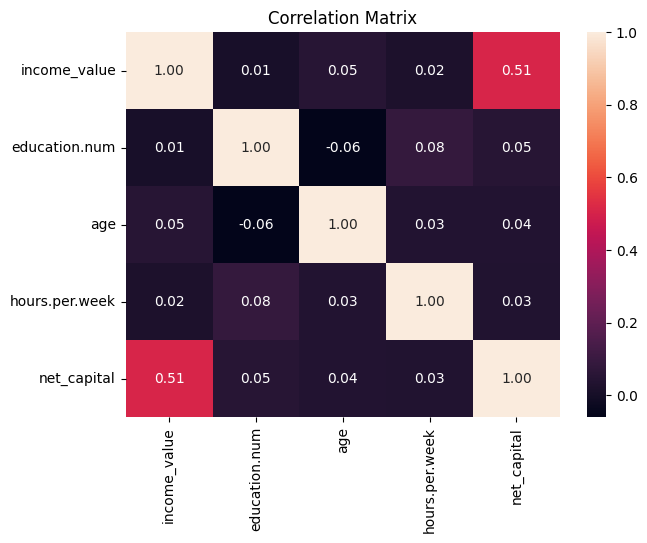

P-values for correlations:
               income_value education.num     age hours.per.week net_capital
age                     0.0           0.0     0.0         0.0001         0.0
education.num        0.3972           0.0     0.0            0.0         0.0
hours.per.week       0.0167           0.0  0.0001            0.0      0.0003
income_value            0.0        0.3972     0.0         0.0167         0.0
net_capital             0.0           0.0     0.0         0.0003         0.0


C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_1860\3094991113.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_values[r][c] = round(pearsonr(df[r], df[c])[1], 4)


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
df2 = df2.replace([np.inf, -np.inf], np.nan) 
df2 = df2.dropna()
corr_matrix = df2.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

def calculate_pvalues(df):
    df_cols = pd.DataFrame(columns=df.columns)
    p_values = df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            p_values[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return p_values

p_values = calculate_pvalues(df2)
print("P-values for correlations:")
print(p_values)